In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sp
%matplotlib inline

# Creating the neural network

In [18]:
# neural network class defination
class neuralNetwork:
    # intialize the nn
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes)) # 100x784
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes)) # 10x100
        
        #activation function
        self.sigmoid = lambda x: sp.expit(x)
        
        # learning rate
        self.lr = learningrate
        pass
    
#     #train the nn
#     def train(self,inputs_list,targets_list):
#         #convert inputs_list to 2d array
#         inputs = np.array(inputs_list,ndmin = 2).T
#         targets = np.array(targets_list,ndmin = 2).T 
#         # signals into hidden layer
#         hidden_inputs = np.dot(self.wih, inputs)
#         # signals emerging from the hidden layer
#         hidden_outputs = self.sigmoid(hidden_inputs)
#         # signals from hidden layer to output layer
#         final_inputs = np.dot(self.who,hidden_outputs)
#         # signal emerging from the output layer
#         final_outputs = self.sigmoid(final_inputs)
        
#         #error is (target - output)
#         output_errors = targets - final_outputs
#         #hidden lyer errors is output_errors,split by weights,recombined at hidden nodes
#         hidden_errors = np.dot(self.who.T, output_errors)
        
#         # print(output_errors.shape)
#         #update the weights between hidden and output layers
#         self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
#         #update the weights between input and hidden layers
#         self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
#         pass
    
    #query the neural network
    def query(self,inputs_list,wih,who):
        #convert inputd list to 2d array
        inputs = np.array(inputs_list,ndmin = 2).T
        # signals into hidden layer
        hidden_inputs = np.dot(wih, inputs)
        # signals emerging from the hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs)
        # signals from hidden layer to output layer
        final_inputs = np.dot(who,hidden_outputs)
        # signal emerging from the output layer
        final_outputs = self.sigmoid(final_inputs)
        
#         print("wih: ", self.wih.shape)
#         print("who: ", self.who.shape)
#         print("inputs_list: ", inputs_list.shape)
        
        return final_outputs

# Preparing data

In [2]:
df = pd.read_csv('dataset/train_100.csv',header=None)
df.head(5)

0    1    2    3    4    5    6    7    8    9   ...   775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]

In [3]:
# creating training set
train_df = df.drop(columns = 0)
real_labels = df[0] 
train_df.head(5)

1    2    3    4    5    6    7    8    9    10  ...   775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

In [4]:
# Create testing dataset
df1 = pd.read_csv('dataset/test_10.csv',header=None)
real_labels_test = df1[0]
test_df = df1.drop(columns = 0)

real_labels_test.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

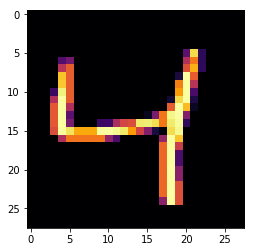

In [5]:
#Lets plot the first row
image_arr = np.asarray(train_df.loc[2,:]).reshape((28,28))
plt.imshow(image_arr,cmap="inferno",interpolation="None")

In [6]:
# lets scale the inputs from 0-255 to 0.01-1.0. we have several options
# we can convert train_df to numpy array and do our calculations or we can use sklear
# or we can use pandas itself
# pd.set_option('display.max_rows', None)
#scaled_train_df.loc[:,650].unique()

scaled_train_df = (train_df/255.0 * 0.99) + 0.01
scaled_train_df.head(5)

scaled_test_df = (test_df/255.0 * 0.99) + 0.01
scaled_test_df.head()

1     2     3     4     5     6     7     8     9     10   ...    775  \
0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  ...   0.01   
1  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  ...   0.01   
2  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  ...   0.01   
3  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  ...   0.01   
4  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  ...   0.01   

    776   777   778   779   780   781   782   783   784  
0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
1  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
2  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
3  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
4  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  

[5 rows x 784 columns]

In [7]:
# configuring outputs
onodes = 10 # number of output nodes
targets = np.zeros(onodes) + 0.01 # creating an array of 0.01s
targets[real_labels[0]] = 0.99 # getting the real label and setting the element in that position as 0.99 
targets

array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.99,  0.01,  0.01,  0.01,  0.01])

# Training the neural network

In [19]:
#number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [140]:
epochs = 5

for e in range(epochs):
    for i in range(train_df.shape[0]):
        inputs = scaled_train_df.loc[i,:]
        targets = targets = np.zeros(output_nodes) + 0.01
        targets[real_labels[i]] = 0.99
        # print(targets)
        n.train(inputs,targets)
        pass
    pass

# Testing the network

In [16]:
import pickle
pickle_off = open("weights.pickle","rb")
weights = pickle.load(pickle_off)
weights[1].shape

(100, 784)

In [20]:
#first lets check on a single row
result = n.query(scaled_test_df.loc[0,:],weights[1],weights[0])
print("{} \n\n The number is: {}".format(result, np.argmax(result)))

[[ 0.06989637]
 [ 0.00716771]
 [ 0.04314391]
 [ 0.02583878]
 [ 0.01683937]
 [ 0.04783409]
 [ 0.00279765]
 [ 0.90735473]
 [ 0.03658632]
 [ 0.0108794 ]] 

 The number is: 7


Since the 7th element has the highest value we can say that the output is 7. Is it correct?

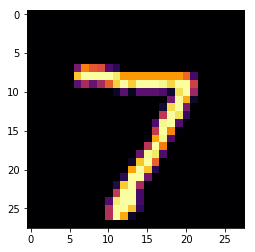

In [21]:
# The nn outputted 7, so let's plot the input into the nn and look at its true value.
image_arr_1 = np.asarray(test_df.loc[0,:]).reshape((28,28))
plt.imshow(image_arr_1,cmap="inferno",interpolation="None")

So the nn was right. It worked! The neural network was able to correctly classify a handwritten
character that it had not seen before. Awesome!

# Scoring the Neural Network

In [23]:
scorecard = 0

for i in range(test_df.shape[0]):
    real_label = real_labels_test[i]
    inputs = scaled_test_df.loc[i,:]
    outputs = n.query(inputs,weights[1],weights[0])
    label = np.argmax(outputs) # the index of the highest value corresponds to the label
    if (label == real_label):
        scorecard += 1
    pass

print("The neural network is {}% accurate.".format((scorecard/test_df.shape[0]) * 100))

The neural network is 70.0% accurate.


** The neural network can be improved using the full dataset. Here, I have used a dataset of only 100 examples and a test set of 10 examples. The original dataset had a training set of 60,000 examples but my pc is too old to train on such a big dataset. **